Проект 2. Разведывательный анализ данных (EDA)

In [1]:
# загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [2]:
# файл с исходным датафреймом
students = pd.read_csv('stud_math.csv')

# оцениваем внешний вид данных
display(students.head(50))

# определяем, что в таблице 17 строковых столбцов и 13 числовых
students.info()

# создадим процентный список долей пропущенных данных для анализа
for col in students.columns:
    pct_missing = np.mean(students[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
# согласно списка, пропущенных данных по всем показателям не более 10%,
# что говорит о репрезентативности данных, ни один столбец не нужно удалять ИСХОДЯ ИЗ ЭТИХ признаков

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
# при желании посмотреть на все столбцы и строки (а также варировать количнством вывода)
# можно использовать такой инструмент
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
# print(students)
# специально прописал как комментарий, т.к. информации очень много

Пропишем ряд функций для дальнейшей работы с датафреймом

In [4]:
# функция по поиску строковых переменных и количеству уникальных значений
# эта функция больше подходит для DF другого типа, поэтому мы ее использовать не будем
# просто потому что могу
def find_cat(students):
    for name in students.columns:
        s = ''
        s += name
        if (type(students[name][0]) == str):
            s += ' строка, '
        if (students[name].nunique() <= 5):
            s += ' мало уникальных'
        if (s != name):
            print(s)


find_cat(students)

school строка,  мало уникальных
sex строка,  мало уникальных
address строка,  мало уникальных
famsize мало уникальных
Pstatus строка,  мало уникальных
Medu мало уникальных
Mjob строка,  мало уникальных
Fjob строка,  мало уникальных
reason строка,  мало уникальных
guardian строка,  мало уникальных
traveltime мало уникальных
studytime мало уникальных
failures мало уникальных
schoolsup строка,  мало уникальных
famsup строка,  мало уникальных
paid строка,  мало уникальных
activities строка,  мало уникальных
nursery строка,  мало уникальных
studytime, granular мало уникальных
higher строка,  мало уникальных
internet мало уникальных
romantic строка,  мало уникальных
freetime мало уникальных
goout мало уникальных
health мало уникальных


In [5]:
# функция по поиску и замене пустых значений на None
def nan_replace(students):
    for columns in students.columns:
        students[columns] = students[columns].apply(
            lambda x: None if pd.isna(x) == True else x)


display(students.famsize.unique())
display(students.famsize.value_counts())

# проверим работу функции
nan_replace(students)
display(students.famsize.unique())
display(students.famsize.value_counts())
display(students.head(10))

array([nan, 'GT3', 'LE3'], dtype=object)

GT3    261
LE3    107
Name: famsize, dtype: int64

array([None, 'GT3', 'LE3'], dtype=object)

GT3    261
LE3    107
Name: famsize, dtype: int64

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,...,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [6]:
# для пердварительного контроля пустых значений используем эту функцию
students.isna().sum()

school                  0
sex                     0
age                     0
address                17
famsize                27
Pstatus                45
Medu                    3
Fedu                   24
Mjob                   19
Fjob                   36
reason                 17
guardian               31
traveltime             28
studytime               7
failures               22
schoolsup               9
famsup                 39
paid                   40
activities             14
nursery                16
studytime, granular     7
higher                 20
internet               34
romantic               31
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [7]:
# функция для строковых переменных
# целесообразно для данного типа данных проводить замену пустых значений на моду
def mode_replace(students):
    for columns in students.columns:
        if (type(students[columns][0])) == str:
            students[columns] = students[columns].apply(lambda x: students[columns].mode()[
                                                        0] if pd.isna(x) == True else x)


mode_replace(students)
students.isna().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                27
Pstatus                 0
Medu                    3
Fedu                   24
Mjob                    0
Fjob                    0
reason                  0
guardian                0
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet               34
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [8]:
# при проверке видно, что в DF есть два столбца с не количественными данными famsize и internet,
# на которых не сработали наши функции.
# посчитаем это значимым и не будем удалять,
# меняем их с помощью функции fillna на слово missing
students['famsize'] = students['famsize'].fillna('missing')
students['internet'] = students['internet'].fillna('missing')

students.isna().sum()

school                  0
sex                     0
age                     0
address                 0
famsize                 0
Pstatus                 0
Medu                    3
Fedu                   24
Mjob                    0
Fjob                    0
reason                  0
guardian                0
traveltime             28
studytime               7
failures               22
schoolsup               0
famsup                  0
paid                    0
activities              0
nursery                 0
studytime, granular     7
higher                  0
internet                0
romantic                0
famrel                 27
freetime               11
goout                   8
health                 15
absences               12
score                   6
dtype: int64

In [9]:
# поскольку мы анализируем влияние всех составляющих датафрейма на score,
# пустые значения в этом столбце не информативны, стоит их удалить с помощью dropna
students = students.dropna(subset=['score'])

# ранее мы использовали для контроля метод isna
# для разнообразия можно использовать info для всего DF
students.info()
# так же как для отдельных столбцов можно применять nunique или value_counts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              389 non-null    object 
 4   famsize              389 non-null    object 
 5   Pstatus              389 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 389 non-null    object 
 9   Fjob                 389 non-null    object 
 10  reason               389 non-null    object 
 11  guardian             389 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            389 non-null    obj

In [10]:
# к числовым столбцам с оставшимися пустыми значениями применяем замену на медианное значение
# остались только числовые переменные поэтому нет нужды ставить условия для типов столбцов
def median_replace(students):
    for columns in students.columns:
        students[columns] = students[columns].apply(
            lambda x: students[columns].median() if pd.isna(x) == True else x)


median_replace(students)

students.isna().sum()
# видим, что пустых значений в DF не осталось
# можем приступать к следующему этапу анализа

school                 0
sex                    0
age                    0
address                0
famsize                0
Pstatus                0
Medu                   0
Fedu                   0
Mjob                   0
Fjob                   0
reason                 0
guardian               0
traveltime             0
studytime              0
failures               0
schoolsup              0
famsup                 0
paid                   0
activities             0
nursery                0
studytime, granular    0
higher                 0
internet               0
romantic               0
famrel                 0
freetime               0
goout                  0
health                 0
absences               0
score                  0
dtype: int64

In [11]:
# проведем первичный анализ корреляции данных между собой
# делаем это только для количественных показателей
for columns in students.columns:
    if (type(students[columns][0])) != str:
        correlation = students.corr()
print(correlation)

                          age      Medu      Fedu  traveltime  studytime  \
age                  1.000000 -0.146405 -0.129685    0.076013  -0.018019   
Medu                -0.146405  1.000000  0.263830   -0.152597   0.079513   
Fedu                -0.129685  0.263830  1.000000    0.038367   0.059179   
traveltime           0.076013 -0.152597  0.038367    1.000000  -0.098226   
studytime           -0.018019  0.079513  0.059179   -0.098226   1.000000   
failures             0.206279 -0.239668 -0.144884    0.035113  -0.169399   
studytime, granular  0.018019 -0.079513 -0.059179    0.098226  -1.000000   
famrel               0.058544  0.000568  0.043889   -0.025048   0.044062   
freetime             0.013994  0.037699 -0.057083   -0.016696  -0.122057   
goout                0.121057  0.071235 -0.017599    0.046390  -0.053554   
health              -0.065719 -0.054431  0.022785   -0.035852  -0.072790   
absences             0.095475 -0.012857  0.002789   -0.038691  -0.024807   
score       

In [12]:
# легко заметить, что столбцы studityme и studytime, granular имеют 100% корреляцию
# можно удалить любой из этих двух столбцов
students.drop(['studytime, granular'], inplace=True, axis=1)
# при повторном запуске этой строки выдается ошибка, потому что столбец уже удален
# в таком случае предпочтительнее перезапускать весь код

In [13]:
# проверяем
display(students)
# количество столбцов убавилось на 1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,missing,A,4.0,4.0,at_home,teacher,...,yes,yes,missing,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,...,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,...,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,...,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,...,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,...,no,yes,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,...,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


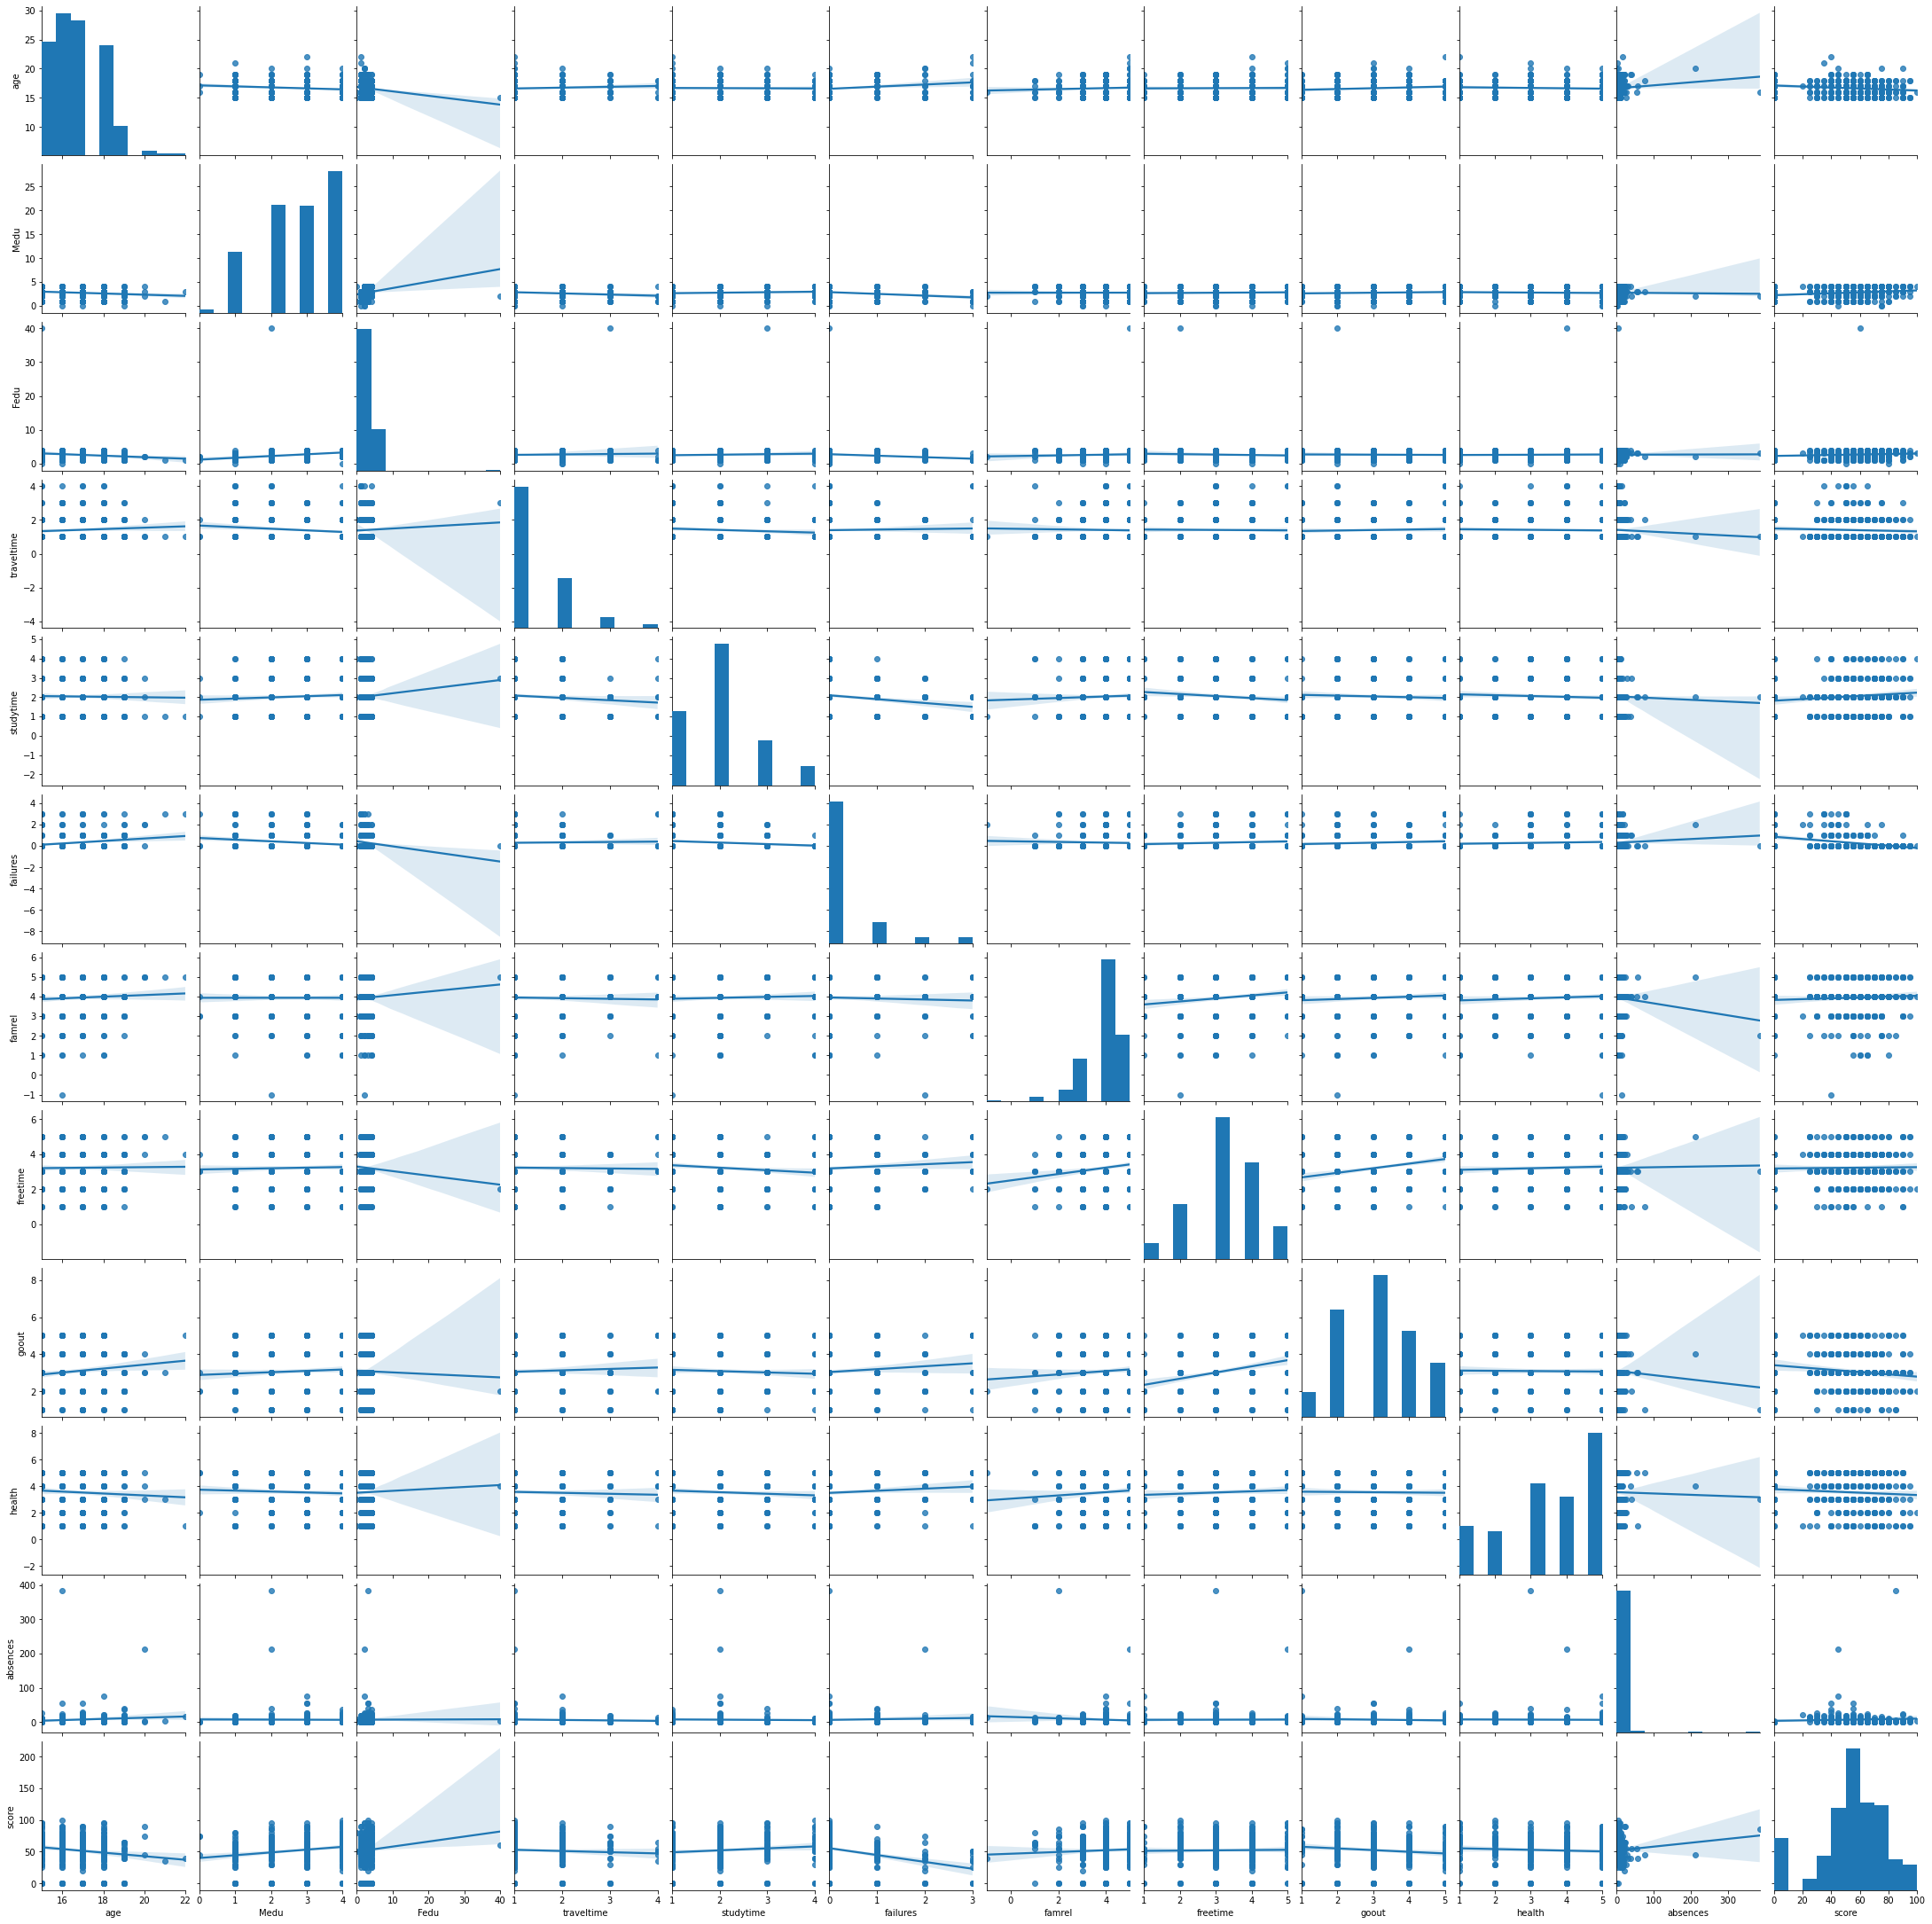

In [14]:
# дополнительно проведем анализ числовых переменных с помощью графиков(надеюсь у вас большой экран)
# на первый взгляд выбросы есть в столбце Age, но показатели там СОВПАДАЮТ с исходным заданием (от 15 до 22 лет)
# невооруженным глазом заметно, что выбросы есть в столбцах Fedu, absences, famrel
# следует изучить их поподробнее
sns.pairplot(students, kind='reg')

In [16]:
# анализируем каждый столбец с выбросами отдельно
pd.DataFrame(students.Fedu.value_counts(dropna=False))

,Fedu
3.0,118
2.0,105
4.0,88
1.0,75
0.0,2
40.0,1


In [18]:
# определяем, что в столбце об образовании отца была вероятнее всего допущена опечатка
# стоит произвести замену показателя 40 на 4
students['Fedu'] = students['Fedu'].apply(lambda x: 4 if x == 40 else x)
pd.DataFrame(students.Fedu.value_counts(dropna=False))

,Fedu
3.0,118
2.0,105
4.0,89
1.0,75
0.0,2


In [19]:
# анализируем следующий столбец с выбросами о количестве пропущенных занятий
pd.DataFrame(students.absences.value_counts(dropna=False))

,absences
0.0,110
4.0,63
2.0,60
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,7


count    389.000000
mean       7.226221
std       23.284884
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

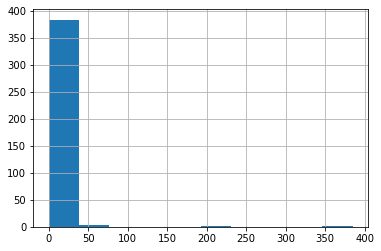

In [20]:
# выбросы очевидны, вряд ли уроков было более 50 в целом
students.absences.hist()
students.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


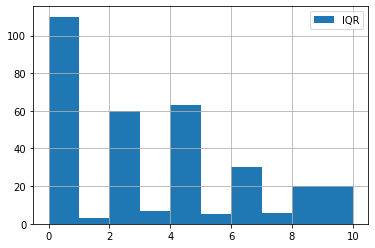

In [21]:
# применим метод IQR
IQRabs = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQRabs),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQRabs, l=perc75 + 1.5*IQRabs))

# посмотрим как это выглядит графически
students.absences.loc[students.absences.between(
    perc25 - 1.5*IQRabs, perc75 + 1.5*IQRabs)].hist(bins=10, range=(0, 10), label='IQR')

plt.legend()

In [22]:
# зафиксируем фильтрацию
students = students.loc[students.absences.between(
    perc25 - 1.5*IQRabs, perc75 + 1.5*IQRabs)]
# проверим
pd.DataFrame(students.absences.value_counts(dropna=False))

,absences
0.0,110
4.0,63
2.0,60
6.0,30
8.0,20
10.0,17
12.0,12
14.0,12
3.0,7
16.0,7


,famrel
4.0,196
5.0,94
3.0,58
2.0,16
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      372 non-null    object 
 1   sex         372 non-null    object 
 2   age         372 non-null    int64  
 3   address     372 non-null    object 
 4   famsize     372 non-null    object 
 5   Pstatus     372 non-null    object 
 6   Medu        372 non-null    float64
 7   Fedu        372 non-null    float64
 8   Mjob        372 non-null    object 
 9   Fjob        372 non-null    object 
 10  reason      372 non-null    object 
 11  guardian    372 non-null    object 
 12  traveltime  372 non-null    float64
 13  studytime   372 non-null    float64
 14  failures    372 non-null    float64
 15  schoolsup   372 non-null    object 
 16  famsup      372 non-null    object 
 17  paid        372 non-null    object 
 18  activities  372 non-null    object 
 19  nursery     372 non-null    o

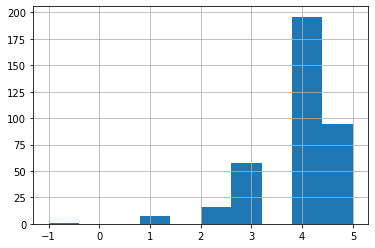

In [23]:
# анализируем следующий столбец с выбросами (семейные отношения)
a = pd.DataFrame(students.famrel.value_counts(dropna=False))
display(a)
students.famrel.hist()
students.famrel.describe()
students.info()

In [25]:
# согласно задания здесь не может быть отрицательного значения
# удалим его для разнообразия
students = students.loc[students.famrel.between(0, 5)]
b = pd.DataFrame(students.famrel.value_counts(dropna=False))
print(b)
students.info()

     famrel
4.0     196
5.0      94
3.0      58
2.0      16
1.0       7
<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      371 non-null    object 
 1   sex         371 non-null    object 
 2   age         371 non-null    int64  
 3   address     371 non-null    object 
 4   famsize     371 non-null    object 
 5   Pstatus     371 non-null    object 
 6   Medu        371 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        371 non-null    object 
 9   Fjob        371 non-null    object 
 10  reason      371 non-null    object 
 11  guardian    371 non-null    object 
 12  traveltime  371 non-null    float64
 13  studytime   371 non-null    float64
 14  failures    371 non-null    float64
 15  schoolsup   371 non-null    object 
 16  famsup      371 non-null    object 
 17  paid        371 non-null    object 
 18

In [26]:
# еще раз посмотрим на корреляцию
# можно вызвать графики, но они требуют очень много памяти
for columns in students.columns:
    if (type(students[columns][0])) != str:
        correlation = students.corr()
print(correlation)

                 age      Medu      Fedu  traveltime  studytime  failures  \
age         1.000000 -0.164431 -0.168771    0.076821  -0.014986  0.198110   
Medu       -0.164431  1.000000  0.601260   -0.165491   0.096267 -0.246760   
Fedu       -0.168771  0.601260  1.000000   -0.131830   0.029135 -0.275107   
traveltime  0.076821 -0.165491 -0.131830    1.000000  -0.087690  0.045950   
studytime  -0.014986  0.096267  0.029135   -0.087690   1.000000 -0.171216   
failures    0.198110 -0.246760 -0.275107    0.045950  -0.171216  1.000000   
famrel      0.046929 -0.009116 -0.016855   -0.032678   0.024909 -0.008840   
freetime    0.035512  0.055362  0.000407   -0.007948  -0.138858  0.082750   
goout       0.134715  0.060126  0.044702    0.037827  -0.045289  0.091737   
health     -0.061916 -0.049172  0.020826   -0.033246  -0.075607  0.088915   
absences    0.157008  0.069802 -0.017406   -0.035763  -0.068056  0.067348   
score      -0.163932  0.215910  0.122414   -0.055144   0.117477 -0.340421   

Подведем итог этапа анализа количественных данных.

Наибольшее влияние на итоговый балл по госэкзамену по математике (score) оказывает показатель количества внеучебных неудач (failure) и имеет отрицательную корреляцию, что логично.
Менее слабое влияние на итоговый балл имеют показатели:
Образование матери (Medu) - чем лучше образование, тем лучше балл у ученика (положительная корреляция).
Образование отца (Fedu) - влияет также, но в меньшей степени.
Возраст ученика (age) - имеет значение, чем он старше, тем хуже результат (отрицательная корреляция).
Время потраченное на учебу (studytime) имеет положительное значение.
Проведенное время с друзьями (goout) напротив имеет отрицательное влияние.

Можно также проанализировать взаимное влияние переменных.
Исходя из этого анализа стоит обратить внимание на показатели:
Свободное время (freetime) - влияет на famrel и goout.
Количество пропущенных занятий (absences).

В столбце score относительно которого мы проводим анализ, есть относительно большая часть данных с показателем 0, которую на первый взгляд можно посчитать как выброс. Но также вероятно, что 0 означает отсутствие ученика на экзамене по тем или иным причинам, которые возможно присутствуют в других переменных.
Приянто решение оставить 0 в столбце score!

Остальные показатели имеют незначительное влияние на итоговый балл. Их можно отбросить при дальнейшей подготовке модели.

Приступим к анализу качественных переменных.

In [28]:
# оценим количество уникальных значений для номинативных переменных
# проверим это с помощью nunique
students.loc[:, ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob',
                 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                 'activities', 'nursery', 'higher', 'internet', 'romantic']].nunique()

# анализ уникальных значений качественных переменных показывает,
# что их количество совпадает с исходными данными(учитывая параметр missing, внесенный нами ранее),
# ошибок и опечаток нет

school        2
sex           2
address       2
famsize       3
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      3
romantic      2
dtype: int64

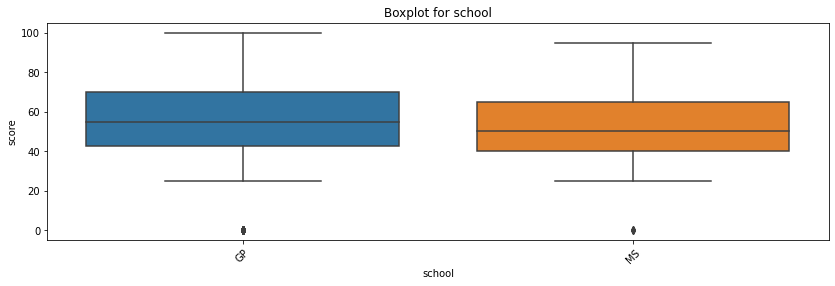

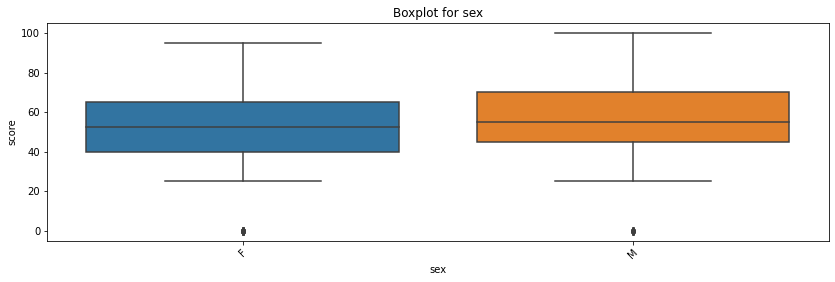

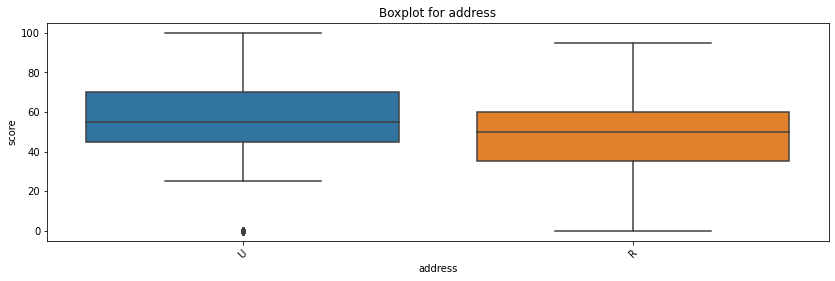

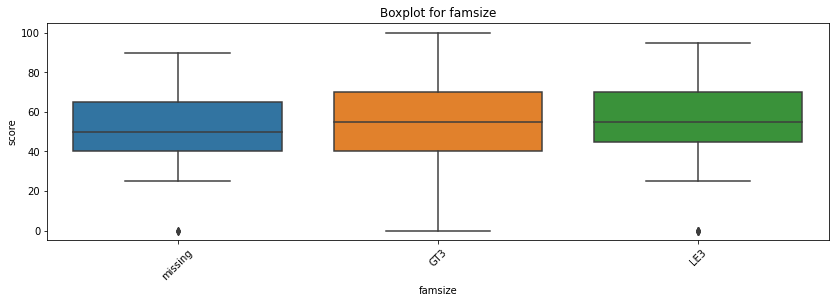

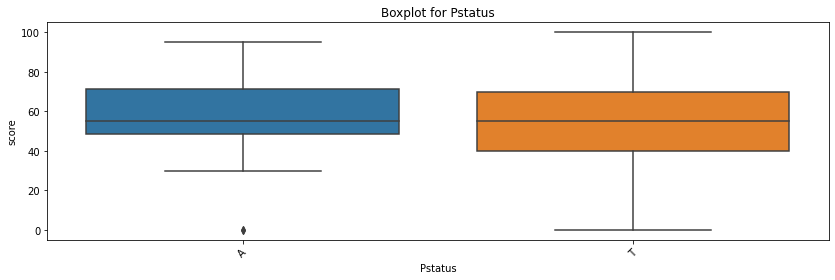

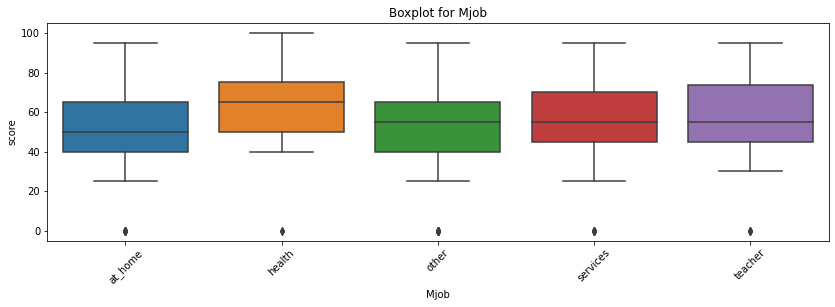

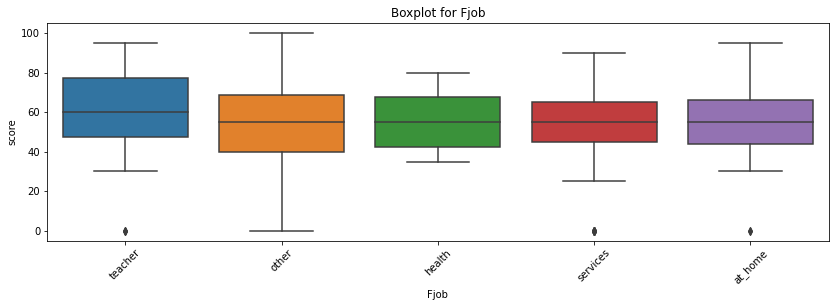

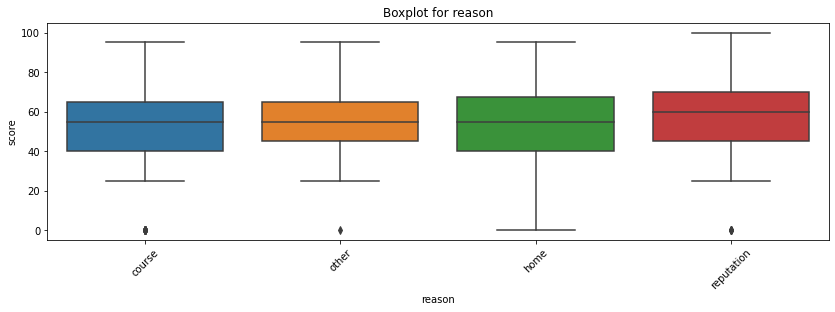

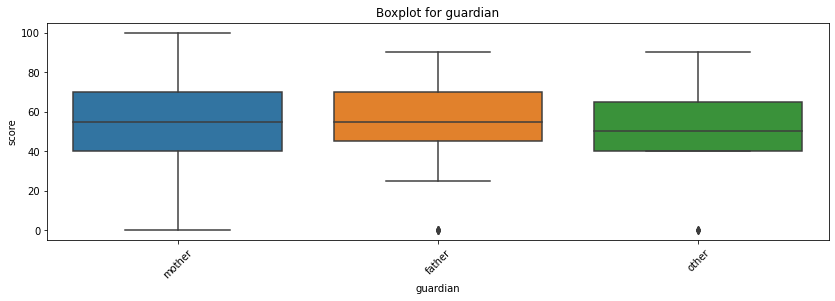

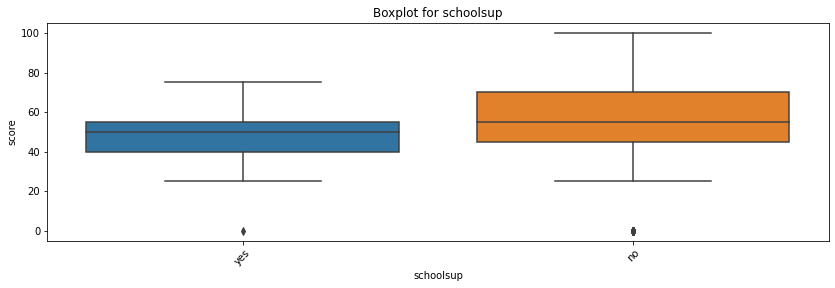

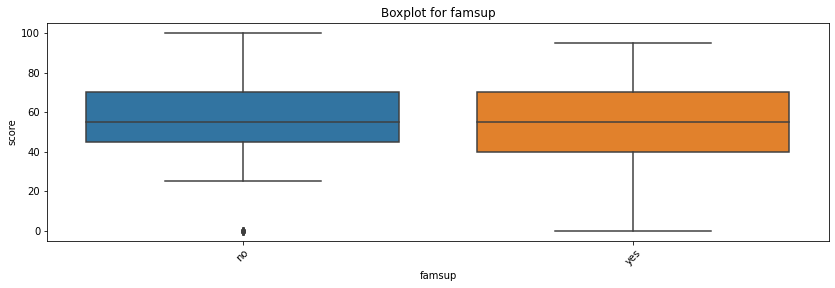

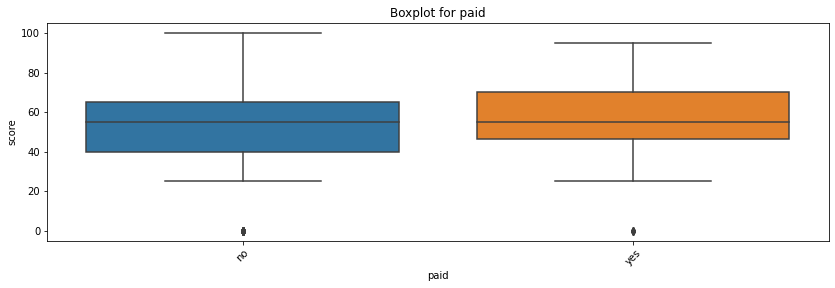

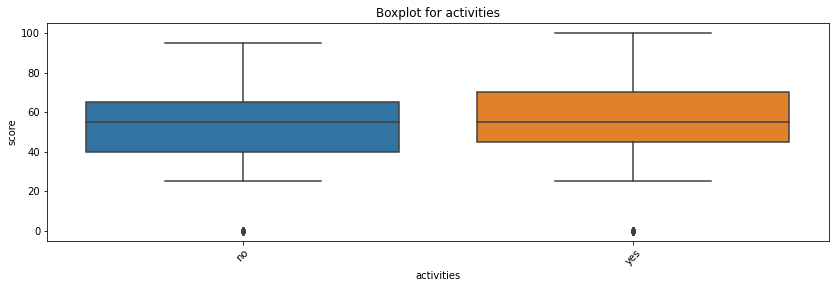

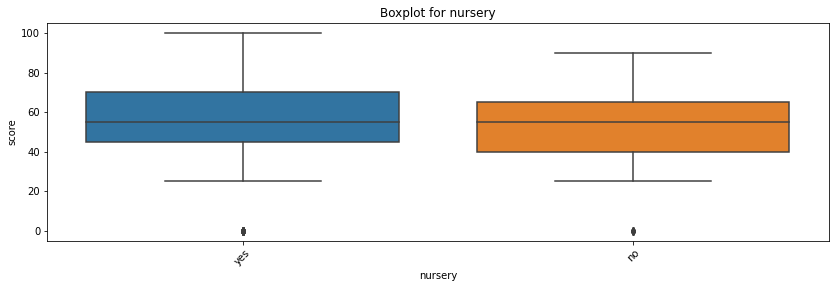

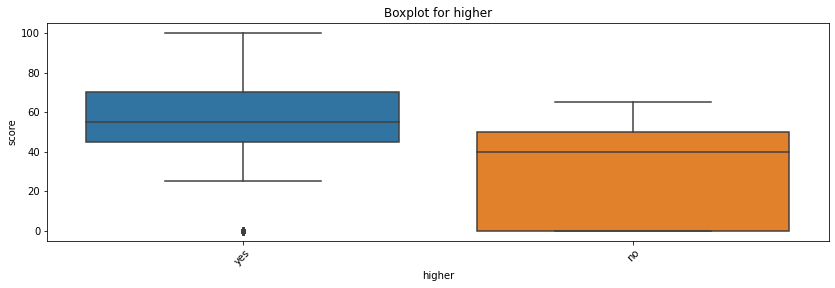

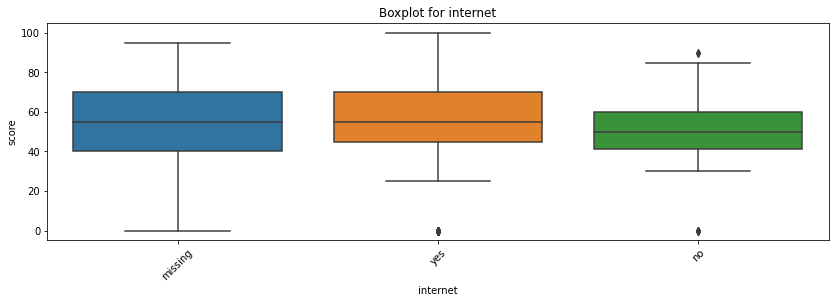

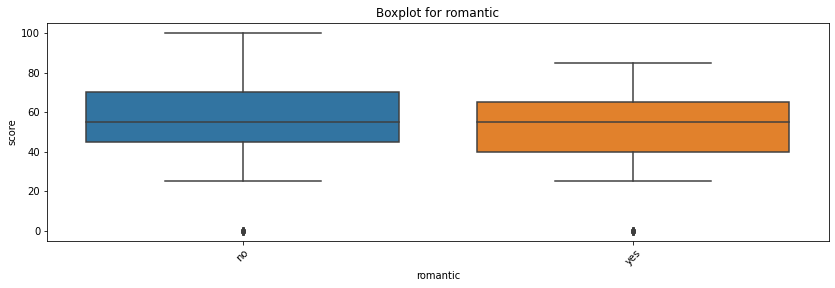

In [27]:
# сделаем функцию построения боксплотов только для строковых переменных
def boxplot(students):
    for columns in students.columns:
        if (type(students[columns][0])) == str:
            fig, ax = plt.subplots(figsize=(14, 4))
            sns.boxplot(x=columns, y='score', data=students, ax=ax)
            plt.xticks(rotation=45)
            ax.set_title('Boxplot for ' + columns)
            plt.show()


boxplot(students)
# на графикках 0 в score показаны как точки(выбросы)

In [29]:
# для дополнительного анализа создадим функцию теста Стьюдента
def get_stat_dif(students):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [30]:
# применим формулу теста Стьдента для качественных переменных
for column in ['school','sex','address','famsize','Pstatus','Mjob',\
                 'Fjob','reason', 'guardian','schoolsup','famsup','paid',\
                 'activities','nursery','higher','internet','romantic']:
    get_stat_dif(students)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Подведем итог этапа анализа качественных данных.

Тест Стьюдента позволяет нам в дальнейшем опираться на данные в столбцах:
Пол ученика (sex)
Тип адреса ученика, городской или за городом (address)
Работа матери (Mjob)
Дополнительные платные занятия (paid)
Желание получить высшее образование (higher)
Состоит ли в романтических отношениях (romantic)

Дополнительный визуальный анализ боксплотов позволяет нам обратить внимание на показатели:
Школа (school)
Работа отца (Fjob), здесь особенное влияние только одного показателя - если отец работает учителем
Дополнительная образовательная поддержка (schoolsup)
Наличие интернета (internet)

Остальные показатели имеют незначительное влияние на итоговый балл. Их можно отбросить при дальнейшей подготовке модели.

В результате EDA для анализа влияния параметров на итоговый балл по госэкзамену по математике были получены следующие выводы:
    в данных достаточно мало пустых значений, не более 10% 
    выбросы найдены только в столбцах Fedu, absences, famrel, score что позволяет сделать вывод о том, что данные достаточно чистые.
    принято решение не принимать 0 в столбце score за выбросы.
    наибольшее влияние на итоговый балл оказывают следующие показатели:
        Количество внеучебных неудач (failure) и имеет отрицательную корреляцию.
        Образование матери (Medu) - чем лучше образование, тем лучше балл у ученика (положительная корреляция).
        Образование отца (Fedu) - влияет также, но в меньшей степени.
        Возраст ученика (age) - имеет значение, чем он старше, тем хуже результат (отрицательная корреляция).
        Время потраченное на учебу (studytime) имеет положительное значение.
        Проведенное время с друзьями (goout) напротив имеет отрицательное влияние.
        Пол ученика (sex)
        Тип адреса ученика, городской или за городом (address)
        Работа матери (Mjob)
        Дополнительные платные занятия (paid)
        Желание получить высшее образование (higher)
        Состоит ли в романтических отношениях (romantic)
    дополнительно принято решение сохранить следующие параметры для построения модели:
        Свободное время (freetime) - влияет на famrel и goout.
        Количество пропущенных занятий (absences).
        Школа (school)
        Работа отца (Fjob), здесь особенное влияние только одного показателя - если отец работает учителем
        Дополнительная образовательная поддержка (schoolsup)
        Наличие интернета (internet)

ВЫВОД. Параметры, которые предлагается использовать в дальнейшем для построения модели:
school
sex
age
address
Medu
Fedu
Mjob
Fjob
studytime
failures
schoolsup
paid
higher
internet
romantic
freetime
goout
absences